# Detect CHARUCO board corners

Requires `aniposelib`. Assuming you already have Anaconda python set up, you can install `aniposelib` with 
> % python -m pip install aniposelib

Also requires the Python interface to OpenCV. This should install as part of your normal Anaconda installation, but if it didn't, you can use
> % conda install opencv

Everything else should be standard Python install


In [ ]:
import os
import aniposelib
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

: 

Set up to detect a CHaRuCO board. Make sure you identify the number of squares and their size in mm. The numbers below should be correct for the board we have in the lab.

`marker_length`, `marker_bits`, and `dict_size` are particular to the sort of CHaRuCO board that we have in the lab. Don't change them unless you know what you're doing.

In [ ]:
board = aniposelib.boards.CharucoBoard(squaresX=6, squaresY=6,
                                        square_length=24.33, marker_length=17, marker_bits=5, dict_size=50)

: 

Fill in the path and the names of video files that have the CHaRuCO images. For paths on Windows machines, be careful not to remove the `r` at the beginning of the quote; without it, all backslashes will be registered as special characters.

In [4]:
videopath = r'/Users/etytel01/Documents/2022/Fath orientation manuscript/data/Sept26/calibration'
videonames = ['Sept26 Calibration-camA.mp4', 'Sept26 Calibration-camB.mp4', 'Sept26 Calibration-camC.mp4']

This will detect points in the first video, just for testing purposes.

In [5]:
video1 = os.path.join(videopath, videonames[0])
rows = board.detect_video(video1, progress=True)

100%|█████████████████████████████| 1534/1534 [00:39<00:00, 38.76it/s]


This is how many frames were detected.

In [10]:
len(rows)

1488

## Check detected corners

This will load in a frame from the video and show the detected corners.

In [6]:
cap = cv2.VideoCapture(video1)

You can change `i` to look at a different frame

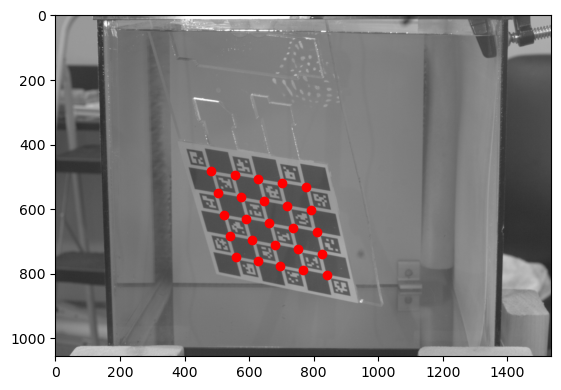

In [11]:
i = 1000
fr = rows[i]['framenum']

cap.set(1, fr)
ret, frame = cap.read()

fig, ax = plt.subplots()
ax.imshow(frame)
ax.plot(rows[i]['corners'][:,0,0], rows[i]['corners'][:,0,1], 'ro')

Don't forget to run the code block below to close the video file.

In [12]:
cap.release()

## Detect corners in all videos

This will run through all of the videos and detect the corners.

In [13]:
camdf = []

for camnum, video1 in enumerate(videonames):
    print(video1)
    fn = os.path.join(videopath, video1)

    rows = board.detect_video(fn, progress=True)

    for row1 in rows:
        df1 = pd.DataFrame(data={'id': row1['ids'][:,0], 'x': row1['corners'][:,0,0], 'y': row1['corners'][:,0,1]})
        df1['frame'] = row1['framenum']
        df1['camera'] = camnum
        camdf.append(df1)


Sept26 Calibration-camA.mp4


100%|█████████████████████████████| 1534/1534 [00:39<00:00, 39.23it/s]


Sept26 Calibration-camB.mp4


100%|█████████████████████████████| 1534/1534 [00:46<00:00, 32.66it/s]


Sept26 Calibration-camC.mp4


100%|█████████████████████████████| 1534/1534 [00:32<00:00, 47.85it/s]


Merge the data frames.

In [14]:
dfall = pd.concat(camdf, ignore_index=True)

Look at the beginning of the data set.

In [15]:
dfall.head()

,id,x,y,frame,camera
0,0,817.399536,244.520950,0,0
1,1,844.513062,314.263885,0,0
2,2,870.858643,382.375793,0,0
3,3,896.622314,448.662720,0,0
4,4,921.763611,514.018799,0,0


And at the end. You should see x y points for multiple frames and multiple cameras.

In [16]:
dfall.tail()

,id,x,y,frame,camera
108745,18,534.429932,572.414856,1533,2
108746,20,553.164307,474.888611,1533,2
108747,21,534.347168,487.634033,1533,2
108748,22,514.803284,500.844696,1533,2
108749,23,494.585449,514.280640,1533,2


And save them all to CSV.

In [17]:
dfall.to_csv(os.path.join(videopath, 'boards.csv'))

Next step: Run the R notebook `rearrange_point_for_easywand.Rmd` to rearrange the points in the CSV file so that EasyWand can load them in.